In [30]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [31]:
# Generate example data
x = np.linspace(0, 2 * np.pi, 100)
y = 2.5 * np.sin(1.8 * x + 0.3) + 0.7 + 0.2 * np.random.normal(size=x.size)

In [32]:
# Convert to torch tensors
x_torch = torch.tensor(x, dtype=torch.float32)
y_torch = torch.tensor(y, dtype=torch.float32)

In [40]:
# Parameters to optimize: amplitude, frequency, phase, offset
params = torch.nn.Parameter(torch.tensor([2.0, 2.0, 0.5, 1.0], dtype=torch.float32))

optimizer = torch.optim.Adam([params], lr=0.05)

In [43]:
for epoch in range(3000):
    optimizer.zero_grad()
    amplitude, frequency, phase, offset = params
    y_pred = amplitude * torch.sin(frequency * x_torch + phase) + offset
    loss = torch.mean((y_pred - y_torch) ** 2)
    loss.backward()
    optimizer.step()

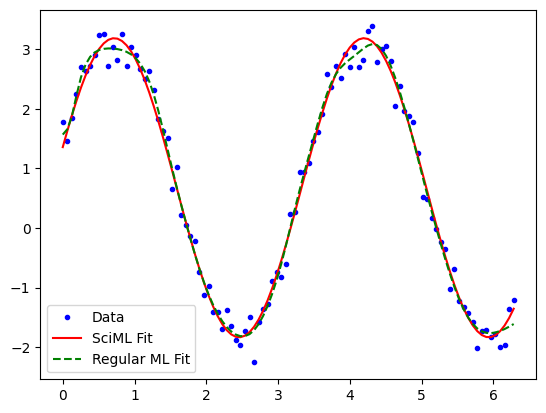

In [44]:
# Plot results
plt.plot(x, y, 'b.', label='Data')
plt.plot(x, params[0].item() * np.sin(params[1].item() * x + params[2].item()) + params[3].item(), 'r-', label='SciML Fit')

# Regular ML: Neural Network fit
import torch.nn as nn
x_torch_nn = torch.tensor(x, dtype=torch.float32).unsqueeze(1)
y_torch_nn = torch.tensor(y, dtype=torch.float32).unsqueeze(1)
model = nn.Sequential(
    nn.Linear(1, 32),
    nn.Tanh(),
    nn.Linear(32, 32),
    nn.Tanh(),
    nn.Linear(32, 1)
)
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()
for epoch in range(1000):
    optimizer.zero_grad()
    y_pred = model(x_torch_nn)
    loss = loss_fn(y_pred, y_torch_nn)
    loss.backward()
    optimizer.step()
y_nn = model(x_torch_nn).detach().numpy().flatten()
plt.plot(x, y_nn, 'g--', label='Regular ML Fit')

plt.legend()
plt.show()